# Transfer learning - Survival prediction
Here we are initializing the survival prediction task by using the pre-trained weights from the "foundation model" and fine tuning on survival prediction. We use for training 70% of the data and 30% for validation. 

This notebook guides you through the use of the clinical transformere API

In [1]:
import os
os.environ["XLA_FLAGS"] = "--xla_gpu_cuda_data_dir=/home/shenwanxiang/anaconda3"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
import tensorflow as tf
tf.test.is_gpu_available()

tf.config.run_functions_eagerly(True)

tf.__version__
import sys
sys.path.append('../../../codeocean/environment/clinical_transformer/')

2025-08-14 16:35:56.147735: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-14 16:35:56.203574: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-14 16:35:56.550255: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/shenwanxiang/anaconda3/lib:
2025-08-14 16:35:56.550288: W tensorflow/compiler/xla/stream_exe

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2025-08-14 16:35:56.955880: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-14 16:35:56.967172: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-08-14 16:35:56.983045: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-08-14 16:35:56.983133: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at

In [2]:
from xai.models import Trainer
from xai.models import SurvivalTransformer
from xai.models import OptimizedSurvivalDataGenerator as SurvivalDataGenerator
from xai.losses.survival import cIndex_SigmoidApprox as cindex_loss
from xai.metrics.survival import sigmoid_concordance as cindex_metric

In [3]:
import pandas as pd
from samecode.random import set_seed

## Dataset

In [4]:
data = pd.read_csv('./data/dataset-train.data.csv')
features = data.columns[-44:].tolist()
#features

## Parameters

In [5]:
max_features_percentile=100
test_size=0.1 # fraction of samples used for validation
repetitions=10 # number replicates (training / validation) random splits to evaluate variability.

mode='survival'
learning_rate=0.0001
epochs=300
verbose=1
seed=0
embedding_size = 128
num_heads = 2
num_layers = 8

In [6]:
! rm -r ./results/TransferLearningSurvival/

/bin/sh: /home/shenwanxiang/anaconda3/lib/libtinfo.so.6: no version information available (required by /bin/sh)
rm: cannot remove './results/TransferLearningSurvival/': No such file or directory


## Training

In [7]:
outdir = './results/TransferLearningSurvival/'

set_seed(0)

trainer = Trainer(
    from_pretrained='../FoundationModel/fold-0_id-0/model.E002000.h5',
    out_dir = outdir,
    max_features_percentile=max_features_percentile,
    test_size=test_size,
    mode=mode,
    model=SurvivalTransformer, 
    dataloader=SurvivalDataGenerator,
    loss=cindex_loss,
    metrics=[cindex_metric]
)

trainer.setup_data(
    data, 
    discrete_features = [],
    continuous_features = features,
    target=['time', 'event']
)

trainer.setup_model(
    learning_rate=learning_rate,
    embedding_size=embedding_size,
    num_heads=num_heads,
    num_layers=num_layers,
    batch_size_max=True,
    save_best_only=False
)

trainer.fit(repetitions=repetitions, epochs=epochs, verbose=verbose, seed=seed)

/home/shenwanxiang/.local/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
INFO	2025-08-14 16:35:58,431	Setting up working directory: ./results/TransferLearningSurvival/
INFO	2025-08-14 16:35:58,432	Setting up transfer learning directory: ./results/TransferLearningSurvival//model.E002000.h5/
2025-08-14 16:35:58.435260: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-08-14 16:35:58.435405: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-08-14 16:35:58.435464: I tensorflow/compiler/xla/str

Epoch 1/300


/home/shenwanxiang/anaconda3/envs/IRnet_env/lib/python3.7/site-packages/tensorflow/python/data/ops/structured_function.py:257: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


WARNING	2025-08-14 16:35:59,727	AutoGraph could not transform <function cIndex_SigmoidApprox at 0x7f61541165f0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


WARNING	2025-08-14 16:35:59,953	AutoGraph could not transform <function sigmoid_concordance at 0x7f61b84b1170> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 1s 539ms/step - loss: 0.5027 - sigmoid_concordance: 0.4907 - val_loss: 0.5018 - val_sigmoid_concordance: 0.4763
Epoch 2/300
1/1 [==============================] - 0s 290ms/step - loss: 0.5021 - sigmoid_concordance: 0.5000 - val_loss: 0.4957 - val_sigmoid_concordance: 0.5286
Epoch 3/300
1/1 [==============================] - 0s 290ms/step - loss: 0.4899 - sigmoid_concordance: 0.5216 - val_loss: 0.4930 - val_sigmoid_concordance: 0.5424
Epoch 4/300
1/1 [==============================] - 0s 291ms/step - loss: 0.4929 - sigmoid_concordance: 0.5141 - val_loss: 0.4900 - val_sigmoid_concordance: 0.5444
Epoch 5/300
1/1 [==============================] - 0s 288

INFO	2025-08-14 16:37:28,443	RUN ID: fold-1_id-1
INFO	2025-08-14 16:37:28,443	RUN ID out directory: ./results/TransferLearningSurvival//model.E002000.h5//fold-1_id-1/
INFO	2025-08-14 16:37:28,498	Training samples: 505
INFO	2025-08-14 16:37:28,498	Testing samples: 57
INFO	2025-08-14 16:37:28,499	Number of features at 100th percentile: 44 that are non nans


Epoch 1/300


/home/shenwanxiang/anaconda3/envs/IRnet_env/lib/python3.7/site-packages/tensorflow/python/data/ops/structured_function.py:257: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


1/1 [==============================] - 0s 451ms/step - loss: 0.5150 - sigmoid_concordance: 0.4696 - val_loss: 0.5195 - val_sigmoid_concordance: 0.4417
Epoch 2/300
1/1 [==============================] - 0s 294ms/step - loss: 0.4935 - sigmoid_concordance: 0.5166 - val_loss: 0.5089 - val_sigmoid_concordance: 0.4672
Epoch 3/300
1/1 [==============================] - 0s 288ms/step - loss: 0.4815 - sigmoid_concordance: 0.5319 - val_loss: 0.4999 - val_sigmoid_concordance: 0.5106
Epoch 4/300
1/1 [==============================] - 0s 284ms/step - loss: 0.4687 - sigmoid_concordance: 0.5637 - val_loss: 0.4917 - val_sigmoid_concordance: 0.5311
Epoch 5/300
1/1 [==============================] - 0s 294ms/step - loss: 0.4667 - sigmoid_concordance: 0.5594 - val_loss: 0.4837 - val_sigmoid_concordance: 0.5379
Epoch 6/300
1/1 [==============================] - 0s 285ms/step - loss: 0.4630 - sigmoid_concordance: 0.5725 - val_loss: 0.4758 - val_sigmoid_concordance: 0.5481
Epoch 7/300
1/1 [=================

INFO	2025-08-14 16:38:57,878	RUN ID: fold-2_id-2
INFO	2025-08-14 16:38:57,878	RUN ID out directory: ./results/TransferLearningSurvival//model.E002000.h5//fold-2_id-2/
INFO	2025-08-14 16:38:57,931	Training samples: 505
INFO	2025-08-14 16:38:57,932	Testing samples: 57
INFO	2025-08-14 16:38:57,933	Number of features at 100th percentile: 44 that are non nans


Epoch 1/300


/home/shenwanxiang/anaconda3/envs/IRnet_env/lib/python3.7/site-packages/tensorflow/python/data/ops/structured_function.py:257: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


1/1 [==============================] - 0s 465ms/step - loss: 0.4826 - sigmoid_concordance: 0.5304 - val_loss: 0.4866 - val_sigmoid_concordance: 0.5293
Epoch 2/300
1/1 [==============================] - 0s 286ms/step - loss: 0.4752 - sigmoid_concordance: 0.5424 - val_loss: 0.4843 - val_sigmoid_concordance: 0.5136
Epoch 3/300
1/1 [==============================] - 0s 287ms/step - loss: 0.4566 - sigmoid_concordance: 0.5789 - val_loss: 0.4797 - val_sigmoid_concordance: 0.5317
Epoch 4/300
1/1 [==============================] - 0s 288ms/step - loss: 0.4504 - sigmoid_concordance: 0.5911 - val_loss: 0.4751 - val_sigmoid_concordance: 0.5425
Epoch 5/300
1/1 [==============================] - 0s 288ms/step - loss: 0.4385 - sigmoid_concordance: 0.5981 - val_loss: 0.4703 - val_sigmoid_concordance: 0.5416
Epoch 6/300
1/1 [==============================] - 0s 290ms/step - loss: 0.4296 - sigmoid_concordance: 0.6028 - val_loss: 0.4672 - val_sigmoid_concordance: 0.5474
Epoch 7/300
1/1 [=================

INFO	2025-08-14 16:40:27,367	RUN ID: fold-3_id-3
INFO	2025-08-14 16:40:27,368	RUN ID out directory: ./results/TransferLearningSurvival//model.E002000.h5//fold-3_id-3/
INFO	2025-08-14 16:40:27,422	Training samples: 505
INFO	2025-08-14 16:40:27,423	Testing samples: 57
INFO	2025-08-14 16:40:27,424	Number of features at 100th percentile: 44 that are non nans


Epoch 1/300


/home/shenwanxiang/anaconda3/envs/IRnet_env/lib/python3.7/site-packages/tensorflow/python/data/ops/structured_function.py:257: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


1/1 [==============================] - 0s 450ms/step - loss: 0.5342 - sigmoid_concordance: 0.4309 - val_loss: 0.5440 - val_sigmoid_concordance: 0.3690
Epoch 2/300
1/1 [==============================] - 0s 290ms/step - loss: 0.5079 - sigmoid_concordance: 0.4843 - val_loss: 0.5234 - val_sigmoid_concordance: 0.4195
Epoch 3/300
1/1 [==============================] - 0s 299ms/step - loss: 0.5108 - sigmoid_concordance: 0.4819 - val_loss: 0.5050 - val_sigmoid_concordance: 0.4726
Epoch 4/300
1/1 [==============================] - 0s 290ms/step - loss: 0.5053 - sigmoid_concordance: 0.4829 - val_loss: 0.4878 - val_sigmoid_concordance: 0.5131
Epoch 5/300
1/1 [==============================] - 0s 290ms/step - loss: 0.4894 - sigmoid_concordance: 0.5155 - val_loss: 0.4715 - val_sigmoid_concordance: 0.5577
Epoch 6/300
1/1 [==============================] - 0s 289ms/step - loss: 0.4946 - sigmoid_concordance: 0.5091 - val_loss: 0.4586 - val_sigmoid_concordance: 0.5981
Epoch 7/300
1/1 [=================

INFO	2025-08-14 16:41:57,287	RUN ID: fold-4_id-4
INFO	2025-08-14 16:41:57,287	RUN ID out directory: ./results/TransferLearningSurvival//model.E002000.h5//fold-4_id-4/
INFO	2025-08-14 16:41:57,341	Training samples: 505
INFO	2025-08-14 16:41:57,341	Testing samples: 57
INFO	2025-08-14 16:41:57,343	Number of features at 100th percentile: 44 that are non nans


Epoch 1/300


/home/shenwanxiang/anaconda3/envs/IRnet_env/lib/python3.7/site-packages/tensorflow/python/data/ops/structured_function.py:257: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


1/1 [==============================] - 0s 454ms/step - loss: 0.4909 - sigmoid_concordance: 0.5172 - val_loss: 0.4675 - val_sigmoid_concordance: 0.5995
Epoch 2/300
1/1 [==============================] - 0s 287ms/step - loss: 0.4869 - sigmoid_concordance: 0.5222 - val_loss: 0.4499 - val_sigmoid_concordance: 0.6348
Epoch 3/300
1/1 [==============================] - 0s 290ms/step - loss: 0.4743 - sigmoid_concordance: 0.5422 - val_loss: 0.4353 - val_sigmoid_concordance: 0.6286
Epoch 4/300
1/1 [==============================] - 0s 287ms/step - loss: 0.4495 - sigmoid_concordance: 0.5782 - val_loss: 0.4252 - val_sigmoid_concordance: 0.6295
Epoch 5/300
1/1 [==============================] - 0s 287ms/step - loss: 0.4619 - sigmoid_concordance: 0.5605 - val_loss: 0.4165 - val_sigmoid_concordance: 0.6278
Epoch 6/300
1/1 [==============================] - 0s 291ms/step - loss: 0.4470 - sigmoid_concordance: 0.5785 - val_loss: 0.4099 - val_sigmoid_concordance: 0.6163
Epoch 7/300
1/1 [=================

INFO	2025-08-14 16:43:26,500	RUN ID: fold-5_id-5
INFO	2025-08-14 16:43:26,508	RUN ID out directory: ./results/TransferLearningSurvival//model.E002000.h5//fold-5_id-5/
INFO	2025-08-14 16:43:26,563	Training samples: 505
INFO	2025-08-14 16:43:26,563	Testing samples: 57
INFO	2025-08-14 16:43:26,564	Number of features at 100th percentile: 44 that are non nans


Epoch 1/300


/home/shenwanxiang/anaconda3/envs/IRnet_env/lib/python3.7/site-packages/tensorflow/python/data/ops/structured_function.py:257: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


1/1 [==============================] - 0s 450ms/step - loss: 0.5210 - sigmoid_concordance: 0.4668 - val_loss: 0.5417 - val_sigmoid_concordance: 0.3761
Epoch 2/300
1/1 [==============================] - 0s 295ms/step - loss: 0.4917 - sigmoid_concordance: 0.5107 - val_loss: 0.5562 - val_sigmoid_concordance: 0.3651
Epoch 3/300
1/1 [==============================] - 0s 293ms/step - loss: 0.4921 - sigmoid_concordance: 0.5106 - val_loss: 0.5640 - val_sigmoid_concordance: 0.3752
Epoch 4/300
1/1 [==============================] - 0s 293ms/step - loss: 0.4718 - sigmoid_concordance: 0.5423 - val_loss: 0.5700 - val_sigmoid_concordance: 0.3881
Epoch 5/300
1/1 [==============================] - 0s 287ms/step - loss: 0.4741 - sigmoid_concordance: 0.5365 - val_loss: 0.5763 - val_sigmoid_concordance: 0.3963
Epoch 6/300
1/1 [==============================] - 0s 299ms/step - loss: 0.4634 - sigmoid_concordance: 0.5500 - val_loss: 0.5811 - val_sigmoid_concordance: 0.4018
Epoch 7/300
1/1 [=================

INFO	2025-08-14 16:44:56,042	RUN ID: fold-6_id-6
INFO	2025-08-14 16:44:56,043	RUN ID out directory: ./results/TransferLearningSurvival//model.E002000.h5//fold-6_id-6/
INFO	2025-08-14 16:44:56,097	Training samples: 505
INFO	2025-08-14 16:44:56,097	Testing samples: 57
INFO	2025-08-14 16:44:56,098	Number of features at 100th percentile: 44 that are non nans


Epoch 1/300


/home/shenwanxiang/anaconda3/envs/IRnet_env/lib/python3.7/site-packages/tensorflow/python/data/ops/structured_function.py:257: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


1/1 [==============================] - 0s 452ms/step - loss: 0.4959 - sigmoid_concordance: 0.5101 - val_loss: 0.4949 - val_sigmoid_concordance: 0.5071
Epoch 2/300
1/1 [==============================] - 0s 291ms/step - loss: 0.4910 - sigmoid_concordance: 0.5157 - val_loss: 0.4916 - val_sigmoid_concordance: 0.5142
Epoch 3/300
1/1 [==============================] - 0s 293ms/step - loss: 0.4802 - sigmoid_concordance: 0.5343 - val_loss: 0.4889 - val_sigmoid_concordance: 0.5266
Epoch 4/300
1/1 [==============================] - 0s 306ms/step - loss: 0.4643 - sigmoid_concordance: 0.5674 - val_loss: 0.4874 - val_sigmoid_concordance: 0.5266
Epoch 5/300
1/1 [==============================] - 0s 290ms/step - loss: 0.4497 - sigmoid_concordance: 0.5840 - val_loss: 0.4855 - val_sigmoid_concordance: 0.5284
Epoch 6/300
1/1 [==============================] - 0s 286ms/step - loss: 0.4432 - sigmoid_concordance: 0.5871 - val_loss: 0.4814 - val_sigmoid_concordance: 0.5284
Epoch 7/300
1/1 [=================

INFO	2025-08-14 16:46:25,599	RUN ID: fold-7_id-7
INFO	2025-08-14 16:46:25,600	RUN ID out directory: ./results/TransferLearningSurvival//model.E002000.h5//fold-7_id-7/
INFO	2025-08-14 16:46:25,653	Training samples: 505
INFO	2025-08-14 16:46:25,653	Testing samples: 57
INFO	2025-08-14 16:46:25,655	Number of features at 100th percentile: 44 that are non nans


Epoch 1/300


/home/shenwanxiang/anaconda3/envs/IRnet_env/lib/python3.7/site-packages/tensorflow/python/data/ops/structured_function.py:257: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


1/1 [==============================] - 0s 456ms/step - loss: 0.5152 - sigmoid_concordance: 0.4700 - val_loss: 0.4743 - val_sigmoid_concordance: 0.5836
Epoch 2/300
1/1 [==============================] - 0s 297ms/step - loss: 0.4946 - sigmoid_concordance: 0.5112 - val_loss: 0.4704 - val_sigmoid_concordance: 0.5994
Epoch 3/300
1/1 [==============================] - 0s 288ms/step - loss: 0.5092 - sigmoid_concordance: 0.4773 - val_loss: 0.4697 - val_sigmoid_concordance: 0.6032
Epoch 4/300
1/1 [==============================] - 0s 288ms/step - loss: 0.4867 - sigmoid_concordance: 0.5224 - val_loss: 0.4707 - val_sigmoid_concordance: 0.5668
Epoch 5/300
1/1 [==============================] - 0s 287ms/step - loss: 0.4432 - sigmoid_concordance: 0.6015 - val_loss: 0.4667 - val_sigmoid_concordance: 0.5593
Epoch 6/300
1/1 [==============================] - 0s 288ms/step - loss: 0.4628 - sigmoid_concordance: 0.5652 - val_loss: 0.4625 - val_sigmoid_concordance: 0.5612
Epoch 7/300
1/1 [=================

INFO	2025-08-14 16:47:55,163	RUN ID: fold-8_id-8
INFO	2025-08-14 16:47:55,164	RUN ID out directory: ./results/TransferLearningSurvival//model.E002000.h5//fold-8_id-8/
INFO	2025-08-14 16:47:55,217	Training samples: 505
INFO	2025-08-14 16:47:55,217	Testing samples: 57
INFO	2025-08-14 16:47:55,219	Number of features at 100th percentile: 44 that are non nans


Epoch 1/300


/home/shenwanxiang/anaconda3/envs/IRnet_env/lib/python3.7/site-packages/tensorflow/python/data/ops/structured_function.py:257: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


1/1 [==============================] - 0s 456ms/step - loss: 0.5027 - sigmoid_concordance: 0.4915 - val_loss: 0.5068 - val_sigmoid_concordance: 0.4425
Epoch 2/300
1/1 [==============================] - 0s 292ms/step - loss: 0.4899 - sigmoid_concordance: 0.5198 - val_loss: 0.4913 - val_sigmoid_concordance: 0.5158
Epoch 3/300
1/1 [==============================] - 0s 289ms/step - loss: 0.4861 - sigmoid_concordance: 0.5283 - val_loss: 0.4777 - val_sigmoid_concordance: 0.5683
Epoch 4/300
1/1 [==============================] - 0s 286ms/step - loss: 0.4783 - sigmoid_concordance: 0.5442 - val_loss: 0.4605 - val_sigmoid_concordance: 0.6090
Epoch 5/300
1/1 [==============================] - 0s 294ms/step - loss: 0.4716 - sigmoid_concordance: 0.5566 - val_loss: 0.4425 - val_sigmoid_concordance: 0.6253
Epoch 6/300
1/1 [==============================] - 0s 295ms/step - loss: 0.4535 - sigmoid_concordance: 0.5817 - val_loss: 0.4259 - val_sigmoid_concordance: 0.6344
Epoch 7/300
1/1 [=================

INFO	2025-08-14 16:49:24,459	RUN ID: fold-9_id-9
INFO	2025-08-14 16:49:24,468	RUN ID out directory: ./results/TransferLearningSurvival//model.E002000.h5//fold-9_id-9/
INFO	2025-08-14 16:49:24,521	Training samples: 505
INFO	2025-08-14 16:49:24,522	Testing samples: 57
INFO	2025-08-14 16:49:24,523	Number of features at 100th percentile: 44 that are non nans


Epoch 1/300


/home/shenwanxiang/anaconda3/envs/IRnet_env/lib/python3.7/site-packages/tensorflow/python/data/ops/structured_function.py:257: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


1/1 [==============================] - 0s 448ms/step - loss: 0.5094 - sigmoid_concordance: 0.4799 - val_loss: 0.4832 - val_sigmoid_concordance: 0.5475
Epoch 2/300
1/1 [==============================] - 0s 305ms/step - loss: 0.4832 - sigmoid_concordance: 0.5342 - val_loss: 0.4780 - val_sigmoid_concordance: 0.5349
Epoch 3/300
1/1 [==============================] - 0s 285ms/step - loss: 0.4674 - sigmoid_concordance: 0.5620 - val_loss: 0.4725 - val_sigmoid_concordance: 0.5260
Epoch 4/300
1/1 [==============================] - 0s 286ms/step - loss: 0.4474 - sigmoid_concordance: 0.5886 - val_loss: 0.4698 - val_sigmoid_concordance: 0.5341
Epoch 5/300
1/1 [==============================] - 0s 288ms/step - loss: 0.4616 - sigmoid_concordance: 0.5631 - val_loss: 0.4664 - val_sigmoid_concordance: 0.5421
Epoch 6/300
1/1 [==============================] - 0s 285ms/step - loss: 0.4298 - sigmoid_concordance: 0.6111 - val_loss: 0.4621 - val_sigmoid_concordance: 0.5466
Epoch 7/300
1/1 [=================

61

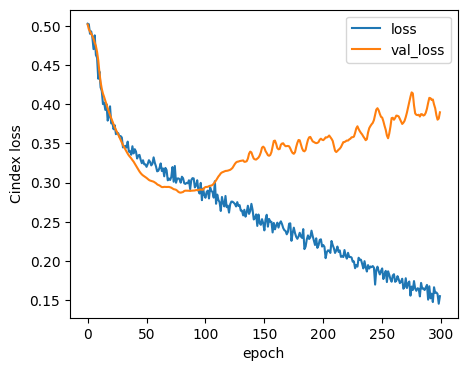

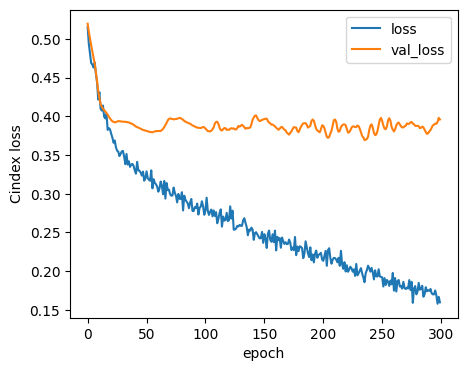

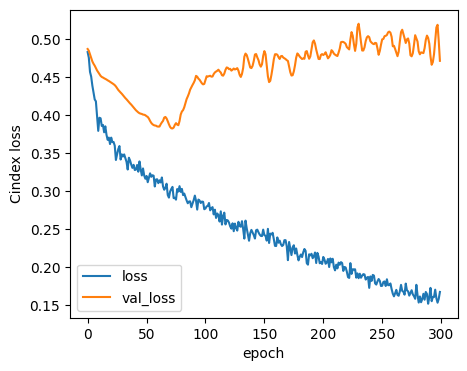

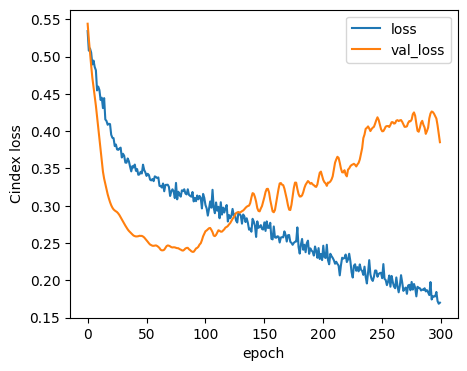

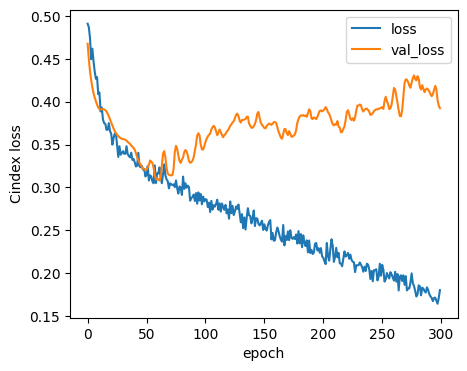

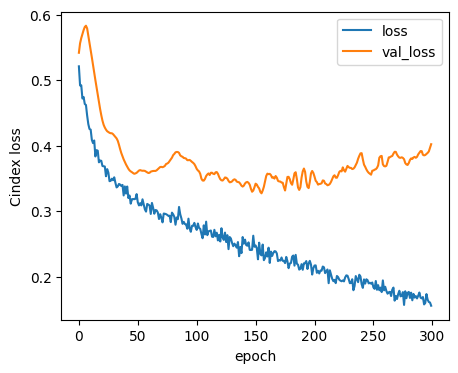

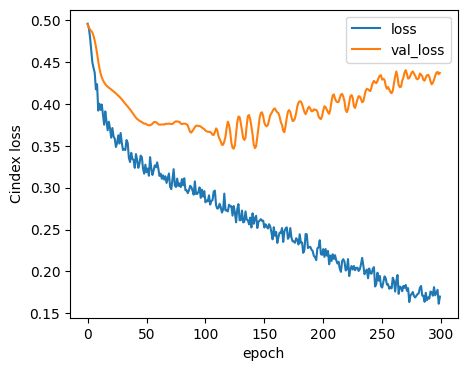

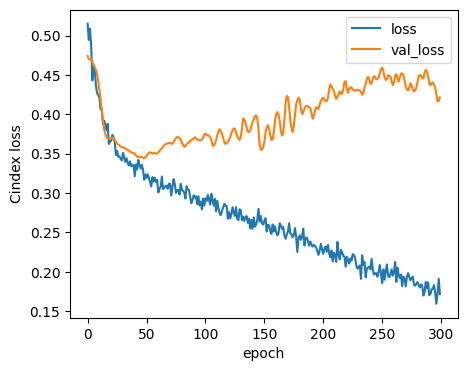

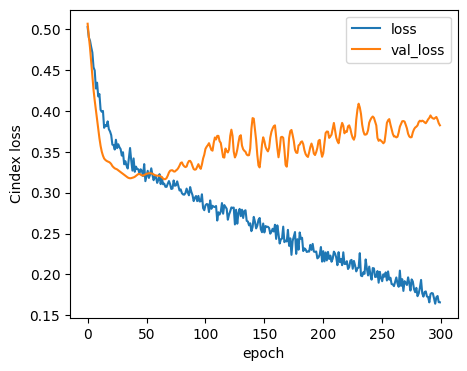

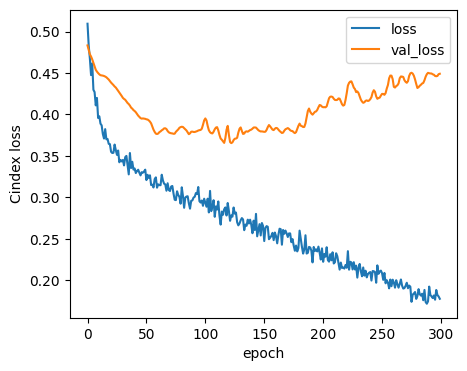

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
best_es = []
repetitions= 10
for i in range(repetitions):
    dfh = pd.read_csv("./results/TransferLearningSurvival/model.E002000.h5/fold-%s_id-%s/history.csv" % (i,i), index_col=0)
    fig, ax=plt.subplots(figsize=(5,4))
    dfh[['loss', 'val_loss']].plot(ax=ax)
    ax.set_ylabel('Cindex loss')
    best_es.append(dfh.val_sigmoid_concordance)
best_epoch = pd.concat(best_es, axis=1).mean(axis=1).idxmax()
best_epoch 

0

In [10]:
pd.DataFrame(best_es)

,0
0,79
1,235
2,72
3,89
4,61
5,155
6,124
7,48
8,65
9,122
